In [1]:
import numpy as np
from bitarray.util import int2ba, ba2int

In [2]:
from ga.fabrics import BinaryFabric
from ga.operators import BinaryOperator
from ga.transformers import MultiDimentionTransformer

from ga.evaluators import MinimumEvaluator
from ga.cultivators import TournamentCultivator, EliteCultivator
from ga.algorithms import SimpleGA

from helpers.plotting import plotContour, plotScores

$$
f\left(x_{1}, x_{2}\right)=\sin \left(10 x_{1}\right)+x_{1} \cos \left(2 \pi x_{2}\right)
$$

$$
x_{1} \in[-2,2], x_{2} \in[0,1]
$$

$$f \to min $$

In [3]:
f = lambda x: np.sin(10*x[0]) + x[0]*np.cos(2*np.pi*x[1])

x1_int = [-2, 2]
x2_int = [0.2, 0.8]

x_ints = [x1_int, x2_int]

In [4]:
h_x1 = 1e-5
h_x2 = 1e-5

n_x1 = len(int2ba(int((x1_int[1] - x1_int[0])/h_x1)))
n_x2 = len(int2ba(int((x2_int[1] - x2_int[0])/h_x2)))

n_xs = [n_x1, n_x2]

n = sum(n_xs)

In [5]:
n_xs

[19, 16]

In [14]:
N = 1000
max_iterations = 50
max_iterations_without_evolution = 20
p_mutate = 0.9
p_cross = 0.5
p_elite = 0.1
N_t = 3

In [15]:
fabric = BinaryFabric(n)
operator = BinaryOperator(n)
transformer = MultiDimentionTransformer(n_xs, x_ints)
evaluator = MinimumEvaluator(f, transformer)

tCultivator = TournamentCultivator(N_t, p_mutate, p_cross, operator, evaluator)
eCultivator = EliteCultivator(tCultivator, p_elite)

ga = SimpleGA(fabric, evaluator, transformer, eCultivator)

In [16]:
ga.solve(N, max_iterations, max_iterations_without_evolution)

0%
10%
20%
30%
40%
50%
60%


([1.7378916509469051, 0.5000137331197071], -2.7328801321724465)

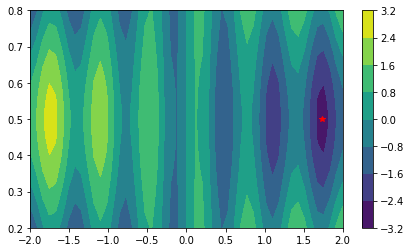

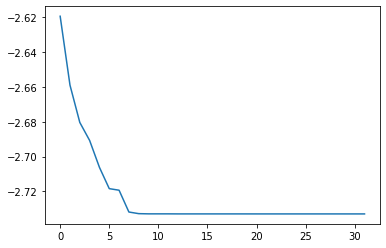

In [17]:
plotContour(lambda x1, x2: f([x1, x2]), x1_int, x2_int, argmin=ga.solution)

plotScores(ga.scores)